In [141]:
import pandas as pd
import numpy as np
import os

In [142]:
df=pd.read_csv("/content/laptop_details.csv")

In [143]:
df.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


DATA CLEANING

In [144]:
import re
regex = r'\b(?:AMD|Intel|M1|M2|Qualcomm)[\s\w]+Processor'
fun = lambda x: re.findall(regex, x)
df['processor'] = df['Feature'].apply(fun)

In [145]:
df['processor']


0                [Intel Core i3 Processor]
1                [Intel Core i3 Processor]
2                [Intel Core i3 Processor]
3        [AMD Ryzen 5 Hexa Core Processor]
4                [Intel Core i5 Processor]
                      ...                 
715    [Intel Celeron Dual Core Processor]
716      [AMD Ryzen 7 Octa Core Processor]
717      [AMD Ryzen 9 Octa Core Processor]
718              [Intel Core i7 Processor]
719              [Intel Core i5 Processor]
Name: processor, Length: 720, dtype: object

In [146]:
regex = r'\d+\sGB[\s\w]+RAM'
fun = lambda x : re.findall(regex, x)
df['RAM'] = df['Feature'].apply(fun)

regex = r'(?:Windows|Chrome|Mac|Dos)[\s\w]+Operating System'
fun = lambda x : re.findall(regex, x, re.IGNORECASE)
df["os"] = df.Feature.apply(fun)



In [147]:
df['RAM'] = df['RAM'].apply(lambda x: ''.join(x))


In [148]:
regex = r'[^GB |a-z|0-9]+.*[A-Za-z]+'
fun = lambda x : re.findall(regex, x)
df['RAM TYPE'] = df['RAM'].apply(fun)




In [149]:
regex = r'\d+\sGB'
fun = lambda x : re.findall(regex, x)
df['RAM'] = df['RAM'].apply(fun)


In [150]:

regex = r'[\d]+\s(?:GB|TB)\s(?:HDD|SSD)'
df['ROM_SIZE'] = df['Feature'].apply(lambda x : re.findall(regex, x))
df['ROM_SIZE'] = df['ROM_SIZE'].apply(lambda x: ''.join(x))

In [151]:
regex = r'(?:HDD|SSD)'
fun=lambda x : re.findall(regex, x)
df['ROM_TYPE'] = df['ROM_SIZE'].apply(fun)
df


,Product,Rating,MRP,Feature,processor,RAM,os,RAM TYPE,ROM_SIZE,ROM_TYPE
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB],[Windows 11 Operating System],[DDR4 RAM],256 GB SSD,[SSD]
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB],[Windows 11 Operating System],[DDR4 RAM],512 GB SSD,[SSD]
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB],[Windows 11 Operating System],[DDR4 RAM],512 GB SSD,[SSD]
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,[AMD Ryzen 5 Hexa Core Processor],[8 GB],[Windows 10 Operating System],[DDR4 RAM],512 GB SSD,[SSD]
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i5 Processor],[8 GB],[Windows 11 Operating System],[DDR4 RAM],512 GB SSD,[SSD]
...,...,...,...,...,...,...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,"₹23,490",Intel Celeron Dual Core Processor4 GB LPDDR4 R...,[Intel Celeron Dual Core Processor],[4 GB],[Chrome Operating System],[LPDDR4 RAM],,[]
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,"₹73,490",AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,[AMD Ryzen 7 Octa Core Processor],[8 GB],[Windows 11 Operating System],[DDR4 RAM],512 GB SSD,[SSD]
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,NaN,"₹1,94,990",AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...,[AMD Ryzen 9 Octa Core Processor],[16 GB],[Windows 11 Operating System],[DDR5 RAM],1 TB SSD,[SSD]
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,"₹1,25,990",Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,[Intel Core i7 Processor],[16 GB],[Windows 11 Operating System],[LPDDR5 RAM],512 GB SSD,[SSD]


In [152]:
regex = r'[\d]+\s(?:GB|TB)'
fun=lambda x : re.findall(regex, x)
df['ROM_SIZE'] = df['ROM_SIZE'].apply(fun)


In [153]:
regex = r'^\w+'

df["Brand"] = df.Product.apply(lambda x: re.findall(regex, x))
df.head()

,Product,Rating,MRP,Feature,processor,RAM,os,RAM TYPE,ROM_SIZE,ROM_TYPE,Brand
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB],[Windows 11 Operating System],[DDR4 RAM],[256 GB],[SSD],[Lenovo]
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB],[Windows 11 Operating System],[DDR4 RAM],[512 GB],[SSD],[Lenovo]
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB],[Windows 11 Operating System],[DDR4 RAM],[512 GB],[SSD],[ASUS]
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,[AMD Ryzen 5 Hexa Core Processor],[8 GB],[Windows 10 Operating System],[DDR4 RAM],[512 GB],[SSD],[HP]
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i5 Processor],[8 GB],[Windows 11 Operating System],[DDR4 RAM],[512 GB],[SSD],[ASUS]


removind [] brackets 

In [154]:
df['processor'] = df['processor'].apply(lambda x: ''.join(x))
df['RAM'] = df['RAM'].apply(lambda x: ''.join(x))
df['RAM TYPE'] = df['RAM TYPE'].apply(lambda x: ''.join(x))
df['os'] = df['os'].apply(lambda x: ''.join(x))
df['Brand'] = df['Brand'].apply(lambda x: ''.join(x))
df['ROM_TYPE'] = df['ROM_TYPE'].apply(lambda x: ','.join([str(i) for i in x]))
df['ROM_SIZE'] = df['ROM_SIZE'].apply(lambda x: ','.join([str(i) for i in x]))

df

,Product,Rating,MRP,Feature,processor,RAM,os,RAM TYPE,ROM_SIZE,ROM_TYPE,Brand
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB,Windows 11 Operating System,DDR4 RAM,256 GB,SSD,Lenovo
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB,Windows 11 Operating System,DDR4 RAM,512 GB,SSD,Lenovo
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB,Windows 11 Operating System,DDR4 RAM,512 GB,SSD,ASUS
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8 GB,Windows 10 Operating System,DDR4 RAM,512 GB,SSD,HP
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8 GB,Windows 11 Operating System,DDR4 RAM,512 GB,SSD,ASUS
...,...,...,...,...,...,...,...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,"₹23,490",Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron Dual Core Processor,4 GB,Chrome Operating System,LPDDR4 RAM,,,ASUS
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,"₹73,490",AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 7 Octa Core Processor,8 GB,Windows 11 Operating System,DDR4 RAM,512 GB,SSD,Lenovo
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,NaN,"₹1,94,990",AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...,AMD Ryzen 9 Octa Core Processor,16 GB,Windows 11 Operating System,DDR5 RAM,1 TB,SSD,ASUS
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,"₹1,25,990",Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,Intel Core i7 Processor,16 GB,Windows 11 Operating System,LPDDR5 RAM,512 GB,SSD,ASUS


In [155]:
df.isnull().sum()

Product        0
Rating       139
MRP            0
Feature        0
processor      0
RAM            0
os             0
RAM TYPE       0
ROM_SIZE       0
ROM_TYPE       0
Brand          0
dtype: int64

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Product    720 non-null    object 
 1   Rating     581 non-null    float64
 2   MRP        720 non-null    object 
 3   Feature    720 non-null    object 
 4   processor  720 non-null    object 
 5   RAM        720 non-null    object 
 6   os         720 non-null    object 
 7   RAM TYPE   720 non-null    object 
 8   ROM_SIZE   720 non-null    object 
 9   ROM_TYPE   720 non-null    object 
 10  Brand      720 non-null    object 
dtypes: float64(1), object(10)
memory usage: 62.0+ KB


In [157]:
df['MRP'] = df['MRP'].str.replace(',', '')
df['MRP'] = df['MRP'].str.replace('₹', '')
df


,Product,Rating,MRP,Feature,processor,RAM,os,RAM TYPE,ROM_SIZE,ROM_TYPE,Brand
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB,Windows 11 Operating System,DDR4 RAM,256 GB,SSD,Lenovo
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB,Windows 11 Operating System,DDR4 RAM,512 GB,SSD,Lenovo
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB,Windows 11 Operating System,DDR4 RAM,512 GB,SSD,ASUS
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8 GB,Windows 10 Operating System,DDR4 RAM,512 GB,SSD,HP
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8 GB,Windows 11 Operating System,DDR4 RAM,512 GB,SSD,ASUS
...,...,...,...,...,...,...,...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,23490,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron Dual Core Processor,4 GB,Chrome Operating System,LPDDR4 RAM,,,ASUS
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,73490,AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 7 Octa Core Processor,8 GB,Windows 11 Operating System,DDR4 RAM,512 GB,SSD,Lenovo
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,NaN,194990,AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...,AMD Ryzen 9 Octa Core Processor,16 GB,Windows 11 Operating System,DDR5 RAM,1 TB,SSD,ASUS
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,125990,Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,Intel Core i7 Processor,16 GB,Windows 11 Operating System,LPDDR5 RAM,512 GB,SSD,ASUS


In [158]:
df["MRP"]= df["MRP"].astype('int')

prediction price using ml

In [159]:
df.columns

Index(['Product', 'Rating', 'MRP', 'Feature', 'processor', 'RAM', 'os',
       'RAM TYPE', 'ROM_SIZE', 'ROM_TYPE', 'Brand'],
      dtype='object')

from above  colums we have choose colums that are used to determine cost of laptop

In [160]:
dfml = df[['MRP', 'processor','RAM','os','RAM TYPE','Brand','ROM_SIZE','ROM_TYPE']]

In [161]:
dfml.head()

,MRP,processor,RAM,os,RAM TYPE,Brand,ROM_SIZE,ROM_TYPE
0,36990,Intel Core i3 Processor,8 GB,Windows 11 Operating System,DDR4 RAM,Lenovo,256 GB,SSD
1,39990,Intel Core i3 Processor,8 GB,Windows 11 Operating System,DDR4 RAM,Lenovo,512 GB,SSD
2,32990,Intel Core i3 Processor,8 GB,Windows 11 Operating System,DDR4 RAM,ASUS,512 GB,SSD
3,49990,AMD Ryzen 5 Hexa Core Processor,8 GB,Windows 10 Operating System,DDR4 RAM,HP,512 GB,SSD
4,49990,Intel Core i5 Processor,8 GB,Windows 11 Operating System,DDR4 RAM,ASUS,512 GB,SSD


In [162]:
dfml.isnull().sum()

MRP          0
processor    0
RAM          0
os           0
RAM TYPE     0
Brand        0
ROM_SIZE     0
ROM_TYPE     0
dtype: int64

analysis of model

checking th all data column  values in order determine cost like if there are unneccary values we can delete

In [163]:
 dfml['processor'].value_counts()

Intel Core i5 Processor                   151
Intel Core i3 Processor                   129
AMD Ryzen 9 Octa Core Processor            87
AMD Ryzen 7 Octa Core Processor            79
Intel Core i7 Processor                    50
AMD Ryzen 5 Hexa Core Processor            48
AMD Ryzen 3 Dual Core Processor            42
AMD Ryzen 5 Quad Core Processor            37
                                           25
Intel Celeron Dual Core Processor          20
Intel Core i9 Processor                    10
M1 Processor                                7
M1 Pro Processor                            6
M2 Processor                                5
AMD Ryzen 3 Quad Core Processor             4
Intel Pentium Quad Core Processor           3
Intel Celeron Quad Core Processor           3
Intel Pentium Silver Processor              2
Intel Evo Core i5 Processor                 2
AMD Athlon Dual Core Processor              2
Intel OptaneIntel Core i3 Processor         2
Qualcomm Snapdragon 7c Gen 2 Proce

In [164]:
 dfml['RAM'].value_counts()

8 GB                402
16 GB               263
4 GB                 37
32 GB                17
128 GB512 GB8 GB      1
Name: RAM, dtype: int64

128 GB512 GB8 GB deleting the row because no computer has 3 ram

In [165]:
dfml= dfml[(dfml['RAM'] != '128 GB512 GB8 GB')]
dfml

,MRP,processor,RAM,os,RAM TYPE,Brand,ROM_SIZE,ROM_TYPE
0,36990,Intel Core i3 Processor,8 GB,Windows 11 Operating System,DDR4 RAM,Lenovo,256 GB,SSD
1,39990,Intel Core i3 Processor,8 GB,Windows 11 Operating System,DDR4 RAM,Lenovo,512 GB,SSD
2,32990,Intel Core i3 Processor,8 GB,Windows 11 Operating System,DDR4 RAM,ASUS,512 GB,SSD
3,49990,AMD Ryzen 5 Hexa Core Processor,8 GB,Windows 10 Operating System,DDR4 RAM,HP,512 GB,SSD
4,49990,Intel Core i5 Processor,8 GB,Windows 11 Operating System,DDR4 RAM,ASUS,512 GB,SSD
...,...,...,...,...,...,...,...,...
715,23490,Intel Celeron Dual Core Processor,4 GB,Chrome Operating System,LPDDR4 RAM,ASUS,,
716,73490,AMD Ryzen 7 Octa Core Processor,8 GB,Windows 11 Operating System,DDR4 RAM,Lenovo,512 GB,SSD
717,194990,AMD Ryzen 9 Octa Core Processor,16 GB,Windows 11 Operating System,DDR5 RAM,ASUS,1 TB,SSD
718,125990,Intel Core i7 Processor,16 GB,Windows 11 Operating System,LPDDR5 RAM,ASUS,512 GB,SSD


In [166]:
 dfml['RAM'].value_counts()

8 GB     402
16 GB    263
4 GB      37
32 GB     17
Name: RAM, dtype: int64

In [167]:
 dfml['os'].value_counts()

Windows 11 Operating System                                                                                560
Windows 10 Operating System                                                                                127
Mac OS Operating System                                                                                     19
Chrome Operating System                                                                                      7
DOS Operating System                                                                                         4
Windows 11 when availableAMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64 bit Windows 11 Operating System      1
Windows 11 when availableAMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64 bit Windows 10 Operating System      1
Name: os, dtype: int64

replacing all the values to windows 11 or 10 as per provided info

In [168]:
dfml.replace("Windows 11 when availableAMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64 bit Windows 11 Operating System", "Windows 11 Operating System", inplace=True)
dfml.replace("Windows 11 when availableAMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64 bit Windows 10 Operating System", "Windows 10 Operating System", inplace=True)

In [169]:
 dfml['RAM TYPE'].value_counts()

DDR4 RAM              560
DDR5 RAM               92
LPDDR4X RAM            37
Unified Memory RAM     12
LPDDR5 RAM              9
LPDDR4 RAM              8
LPDDR3 RAM              1
Name: RAM TYPE, dtype: int64

deleting null values in Ram_type

In [170]:
dfml = dfml.loc[dfml["ROM_TYPE"] >= " " ]
dfml

,MRP,processor,RAM,os,RAM TYPE,Brand,ROM_SIZE,ROM_TYPE
0,36990,Intel Core i3 Processor,8 GB,Windows 11 Operating System,DDR4 RAM,Lenovo,256 GB,SSD
1,39990,Intel Core i3 Processor,8 GB,Windows 11 Operating System,DDR4 RAM,Lenovo,512 GB,SSD
2,32990,Intel Core i3 Processor,8 GB,Windows 11 Operating System,DDR4 RAM,ASUS,512 GB,SSD
3,49990,AMD Ryzen 5 Hexa Core Processor,8 GB,Windows 10 Operating System,DDR4 RAM,HP,512 GB,SSD
4,49990,Intel Core i5 Processor,8 GB,Windows 11 Operating System,DDR4 RAM,ASUS,512 GB,SSD
...,...,...,...,...,...,...,...,...
714,90000,AMD Ryzen 7 Octa Core Processor,16 GB,Windows 10 Operating System,DDR4 RAM,HP,512 GB,SSD
716,73490,AMD Ryzen 7 Octa Core Processor,8 GB,Windows 11 Operating System,DDR4 RAM,Lenovo,512 GB,SSD
717,194990,AMD Ryzen 9 Octa Core Processor,16 GB,Windows 11 Operating System,DDR5 RAM,ASUS,1 TB,SSD
718,125990,Intel Core i7 Processor,16 GB,Windows 11 Operating System,LPDDR5 RAM,ASUS,512 GB,SSD


In [171]:
dfml['ROM_TYPE'].value_counts()

SSD            662
HDD,SSD         29
HDD             17
SSD,HDD,SSD      1
Name: ROM_TYPE, dtype: int64

In [172]:
dfml = dfml[(dfml['ROM_TYPE']!= 'SSD,HDD,SSD') ]

In [173]:
dfml['ROM_SIZE'].value_counts()

512 GB           375
1 TB             193
256 GB            98
1 TB,256 GB       26
2 TB               7
128 GB             6
1 TB,512 GB        2
256 GB,256 GB      1
Name: ROM_SIZE, dtype: int64

In [174]:
dfml = dfml[(dfml['ROM_SIZE']!= '256 GB,256 GB') ]

In [175]:
dfml['Brand'].value_counts()

ASUS         245
Lenovo       192
HP            61
DELL          61
acer          33
RedmiBook     31
MSI           30
Infinix       20
APPLE         19
realme         6
ALIENWARE      3
Ultimus        2
SAMSUNG        1
Vaio           1
GIGABYTE       1
Nokia          1
Name: Brand, dtype: int64

uni variate analysis cateorigical catagory

In [176]:
num_df = dfml.select_dtypes(include=['object'])
num_df.columns

Index(['processor', 'RAM', 'os', 'RAM TYPE', 'Brand', 'ROM_SIZE', 'ROM_TYPE'], dtype='object')

<Axes: >

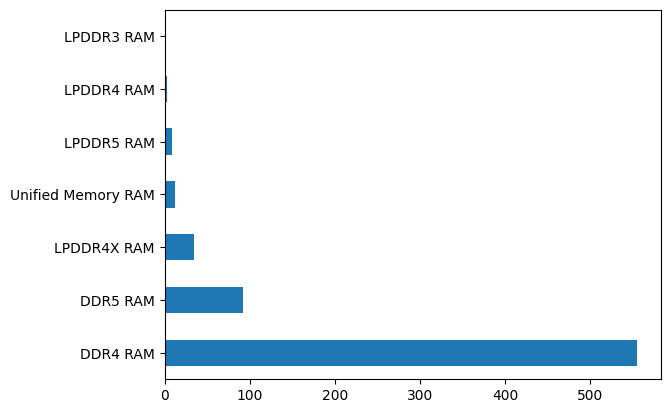

In [177]:
num_df['RAM TYPE'].value_counts().plot(kind='barh')

<Axes: >

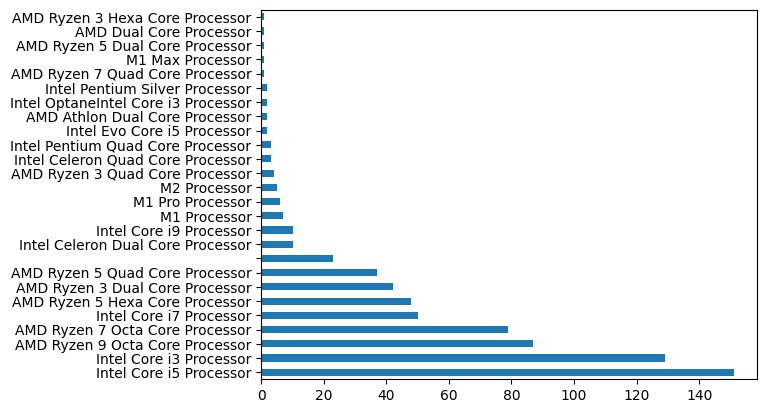

In [178]:
num_df['processor'].value_counts().plot(kind='barh')

<Axes: >

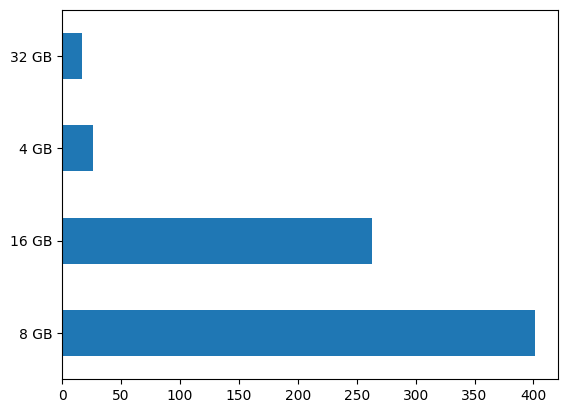

In [179]:
num_df['RAM'].value_counts().plot(kind='barh')

<Axes: >

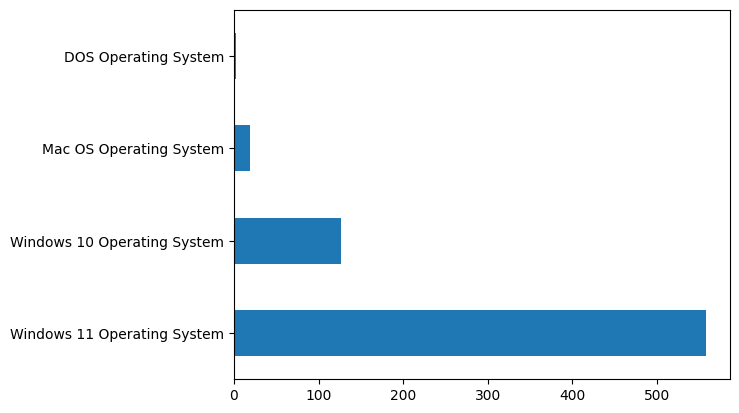

In [180]:
num_df['os'].value_counts().plot(kind='barh')

<Axes: >

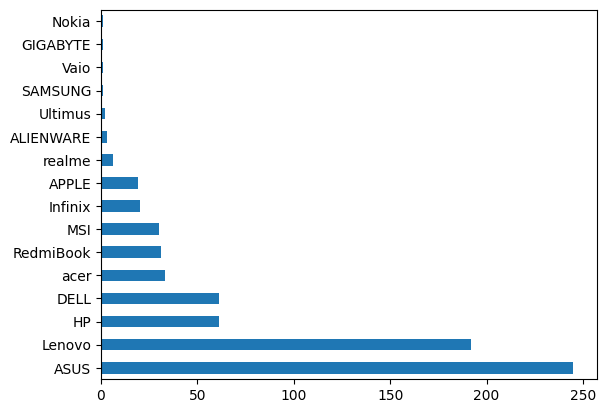

In [181]:
num_df['Brand'].value_counts().plot(kind='barh')

<Axes: >

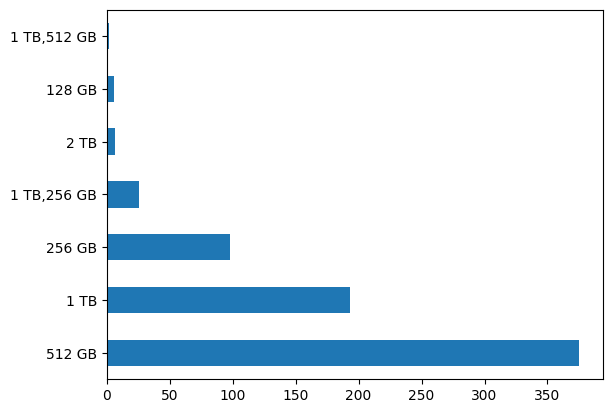

In [182]:
num_df['ROM_SIZE'].value_counts().plot(kind='barh')

<Axes: >

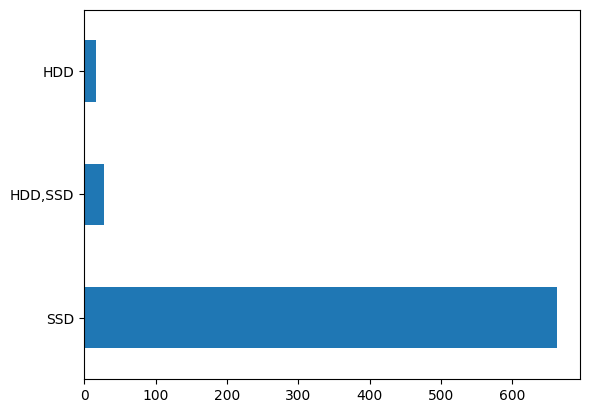

In [183]:
num_df['ROM_TYPE'].value_counts().plot(kind='barh')

In [184]:
dfml.columns

Index(['MRP', 'processor', 'RAM', 'os', 'RAM TYPE', 'Brand', 'ROM_SIZE',
       'ROM_TYPE'],
      dtype='object')

bivariate analysis

numerical analysis

<Axes: >

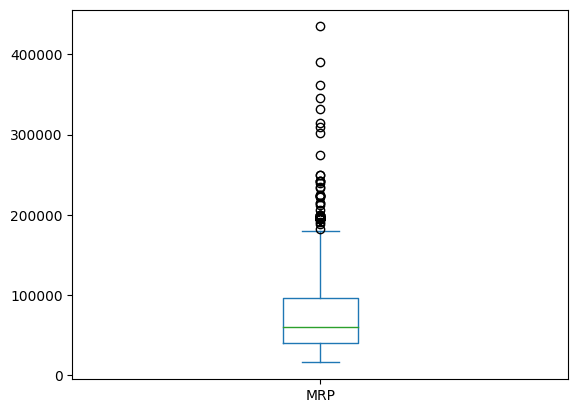

In [185]:
dfml['MRP'].plot(kind='box')

<Axes: ylabel='Density'>

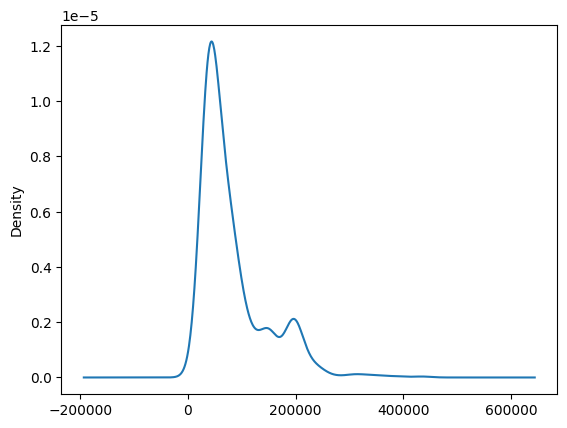

In [186]:
dfml['MRP'].plot(kind='kde')

<Axes: >

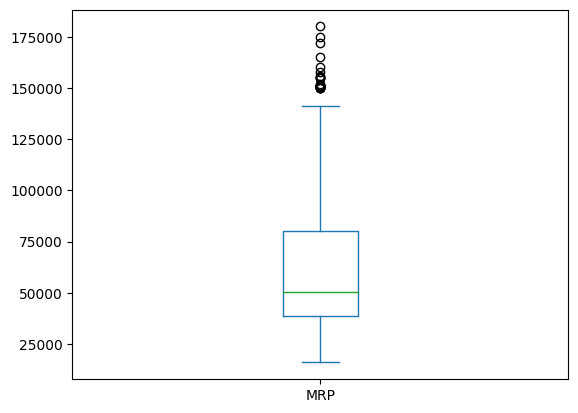

In [187]:
q1 = dfml['MRP'].quantile(0.25)
q3 = dfml['MRP'].quantile(0.75)

IQR = q3 - q1

income_lower_bound = q1 - 1.5 * IQR
income_upper_bound = q3 + 1.5 * IQR

clean_df = dfml[(dfml['MRP'] >= income_lower_bound) & (dfml['MRP'] <= income_upper_bound)]

clean_df['MRP'].plot(kind='box')

<Axes: >

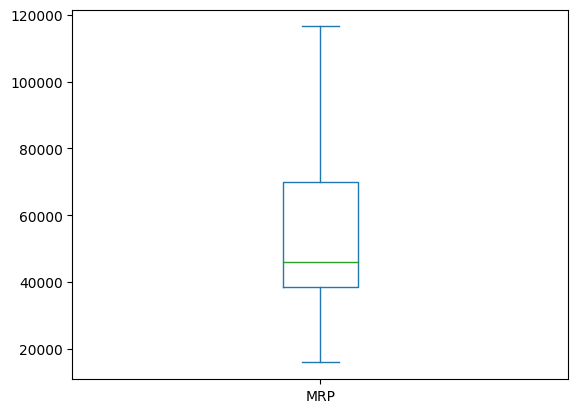

In [188]:
clean_df = clean_df[clean_df['MRP'] < 117000]

clean_df['MRP'].plot(kind='box')

<Axes: title={'center': 'MRP'}, xlabel='RAM'>

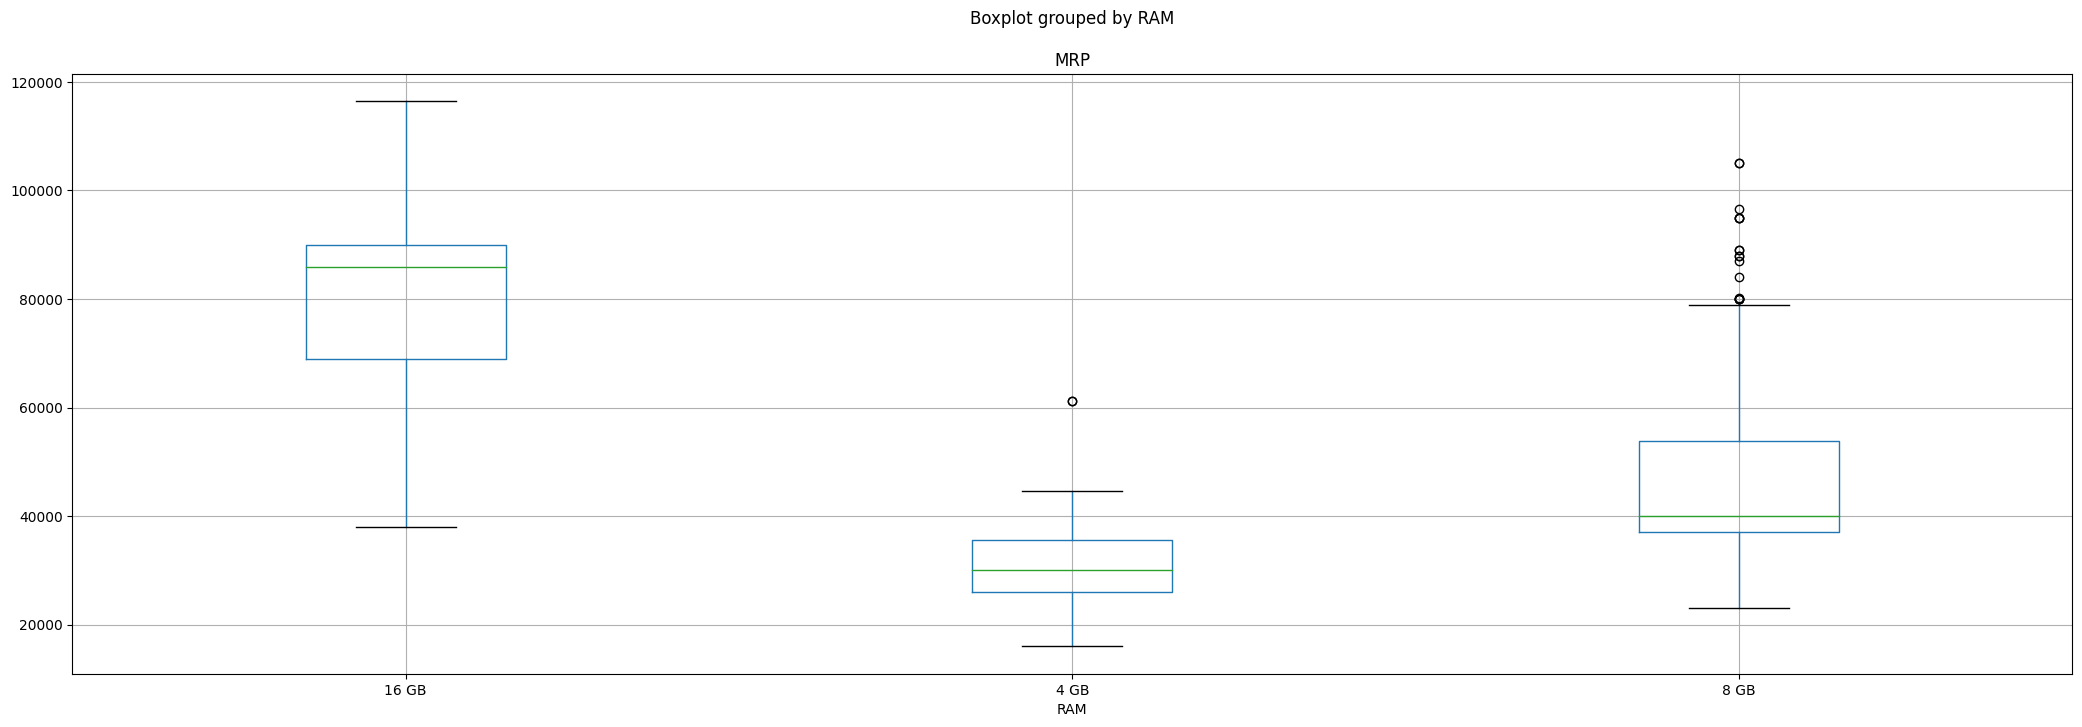

In [189]:
clean_df.boxplot(by='RAM', column='MRP', figsize=(25, 8))

<Axes: title={'center': 'MRP'}, xlabel='RAM TYPE'>

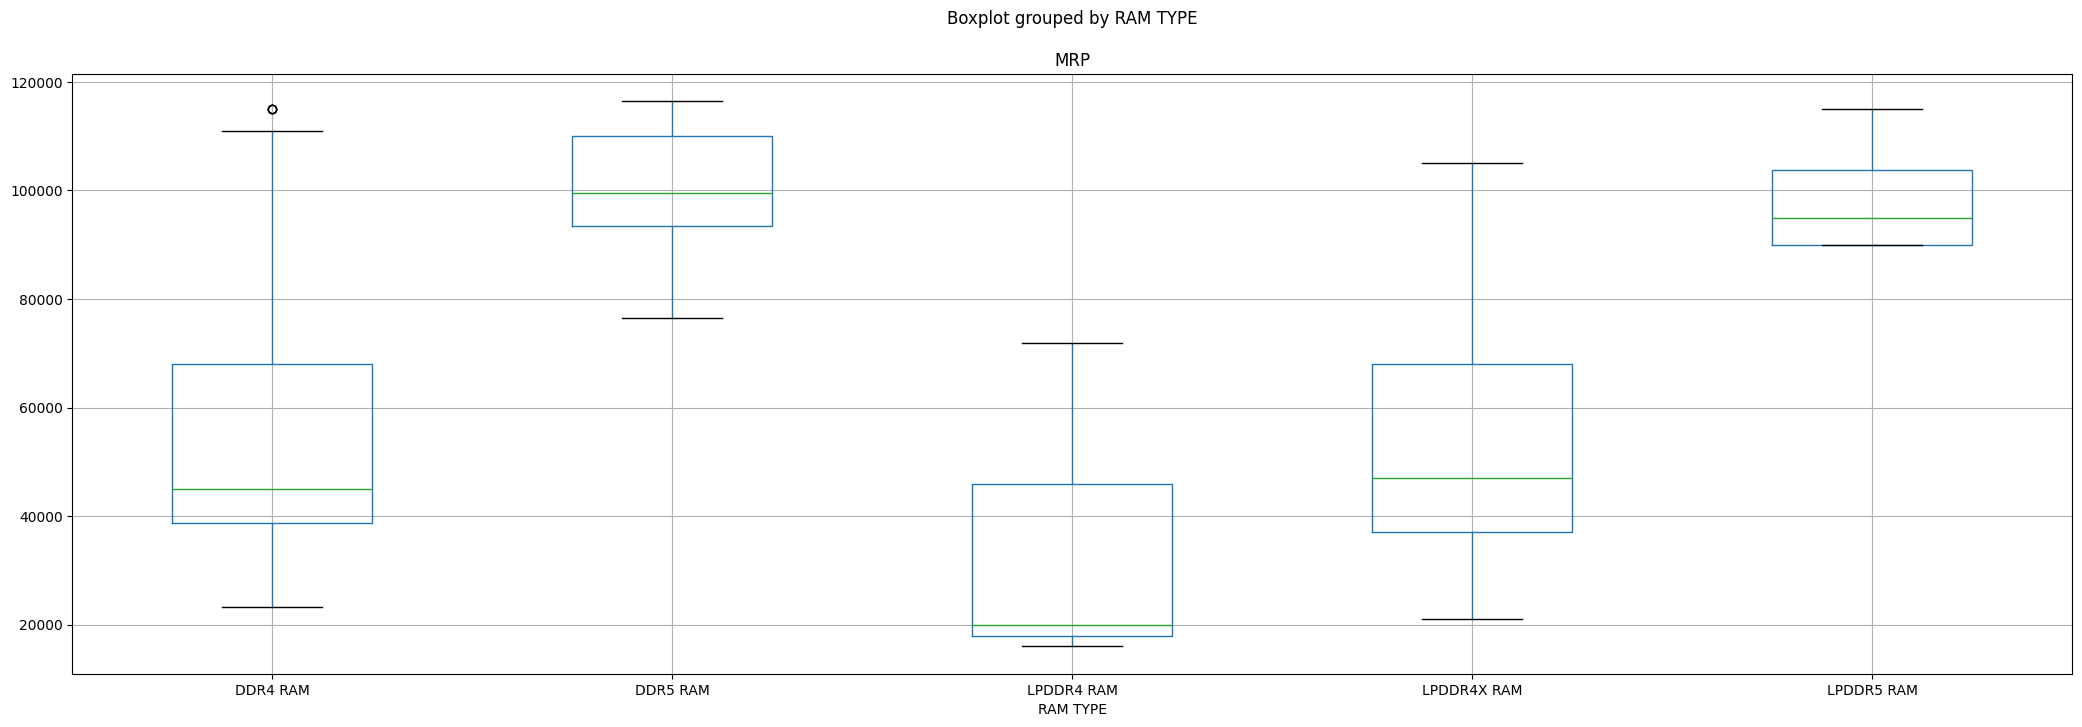

In [190]:
clean_df.boxplot(by='RAM TYPE', column='MRP', figsize=(25, 8))

<Axes: title={'center': 'MRP'}, xlabel='Brand'>

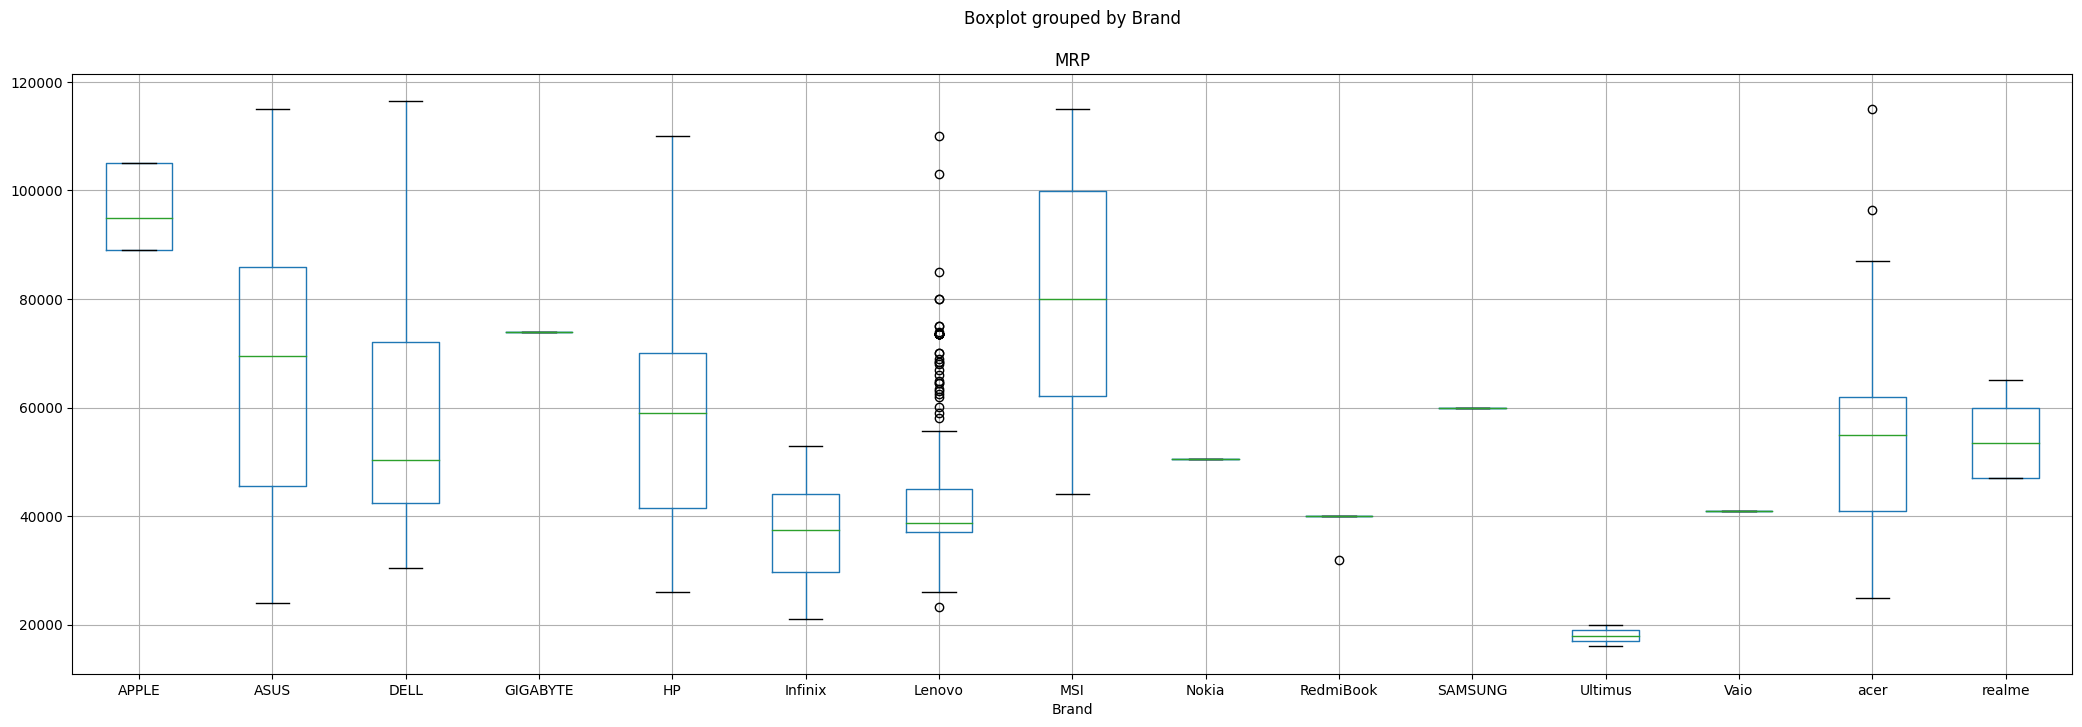

In [191]:
clean_df.boxplot(by='Brand', column='MRP', figsize=(25, 8))

<Axes: title={'center': 'MRP'}, xlabel='ROM_SIZE'>

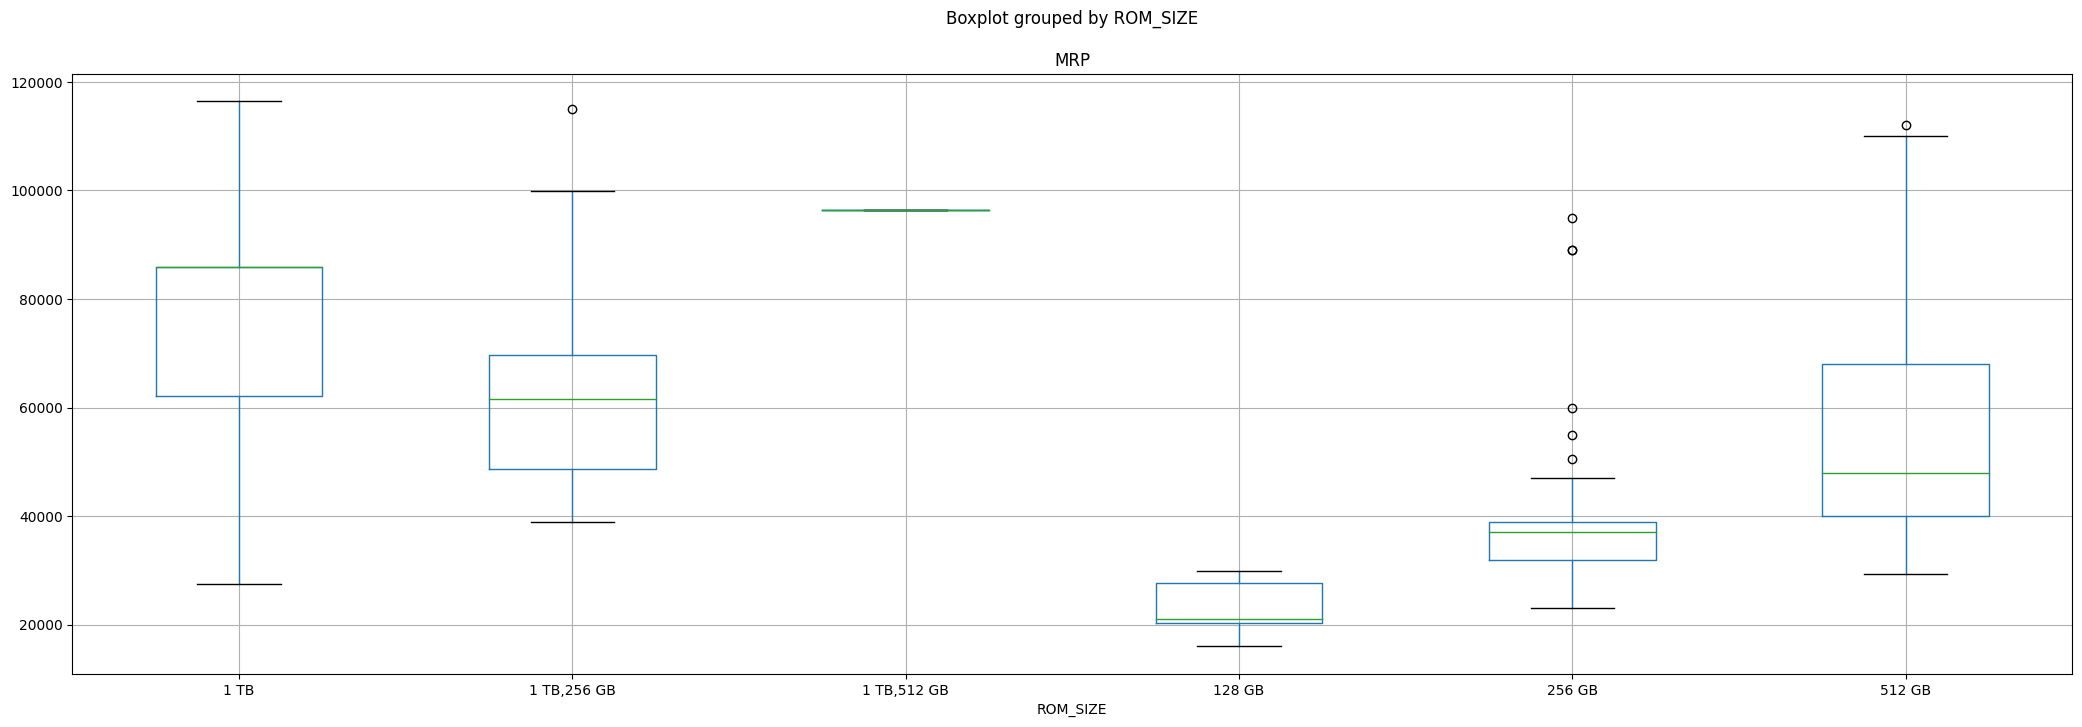

In [192]:
clean_df.boxplot(by='ROM_SIZE', column='MRP', figsize=(25, 8))

<Axes: title={'center': 'MRP'}, xlabel='ROM_TYPE'>

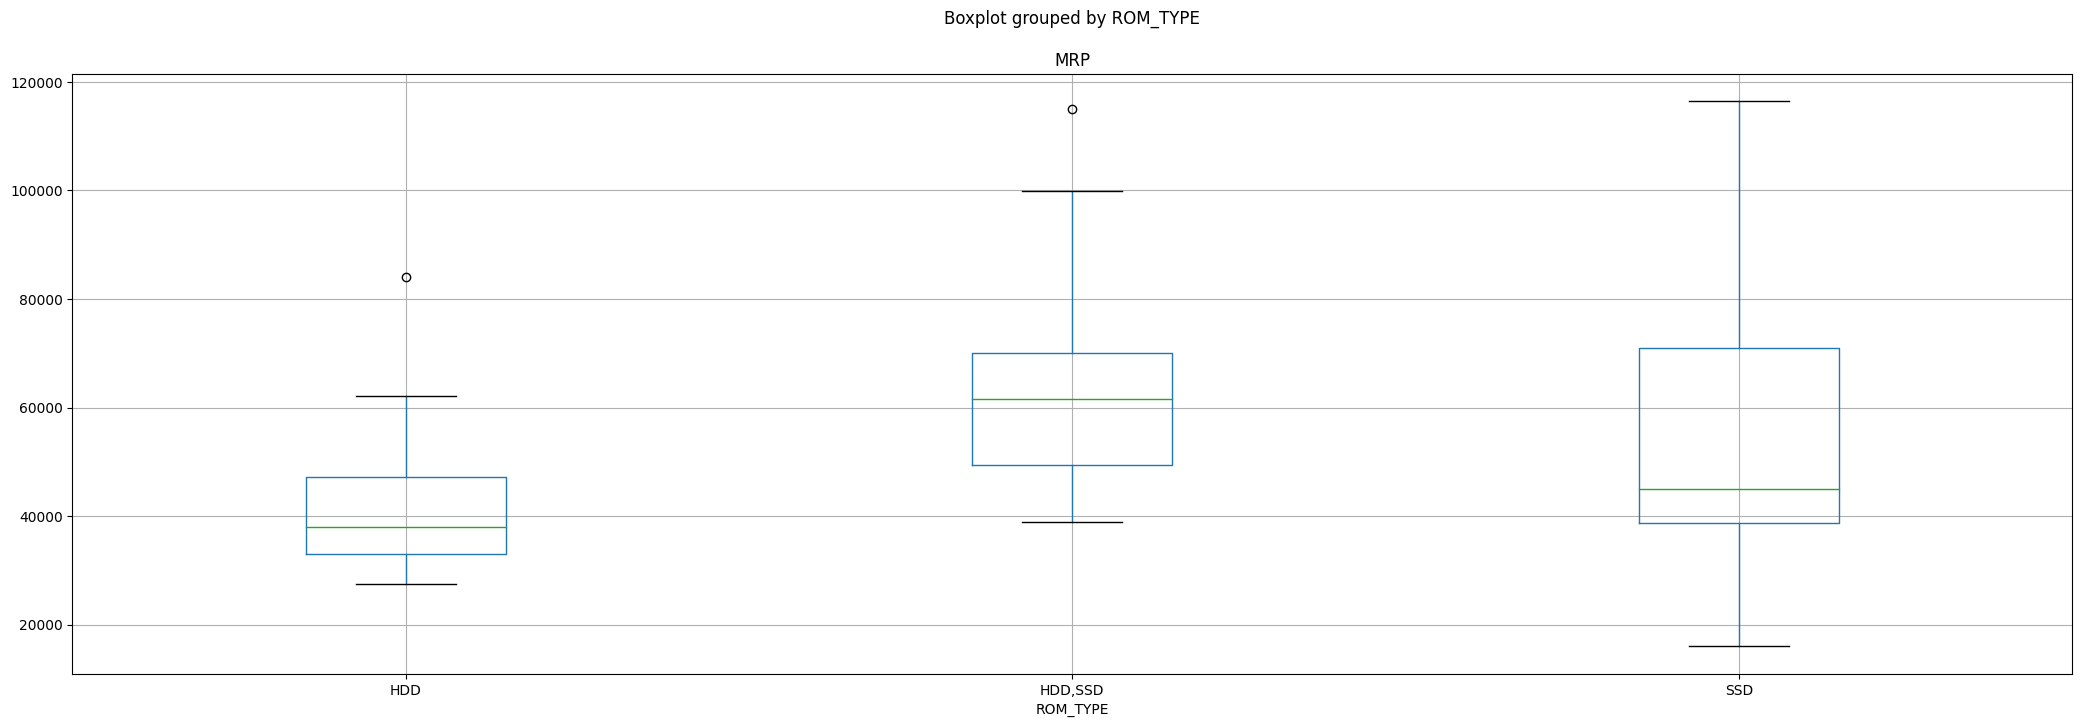

In [193]:
clean_df.boxplot(by='ROM_TYPE', column='MRP', figsize=(25, 8))

<Axes: title={'center': 'MRP'}, xlabel='os'>

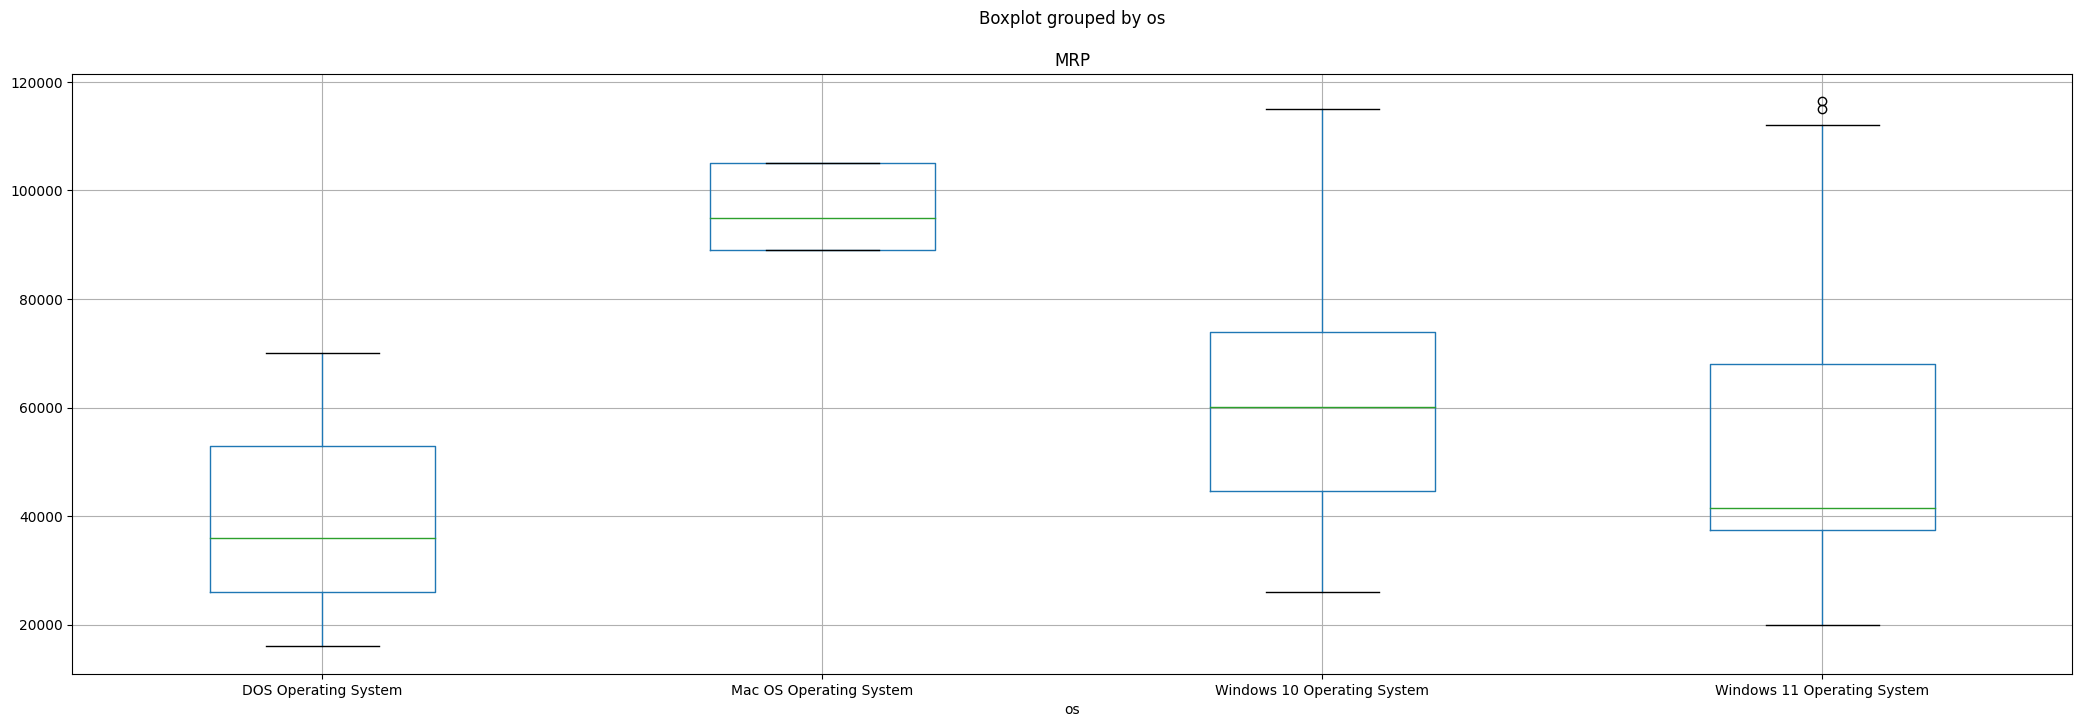

In [194]:
clean_df.boxplot(by='os', column='MRP', figsize=(25, 8))

machine learning algorithm

In [195]:
dfml

,MRP,processor,RAM,os,RAM TYPE,Brand,ROM_SIZE,ROM_TYPE
0,36990,Intel Core i3 Processor,8 GB,Windows 11 Operating System,DDR4 RAM,Lenovo,256 GB,SSD
1,39990,Intel Core i3 Processor,8 GB,Windows 11 Operating System,DDR4 RAM,Lenovo,512 GB,SSD
2,32990,Intel Core i3 Processor,8 GB,Windows 11 Operating System,DDR4 RAM,ASUS,512 GB,SSD
3,49990,AMD Ryzen 5 Hexa Core Processor,8 GB,Windows 10 Operating System,DDR4 RAM,HP,512 GB,SSD
4,49990,Intel Core i5 Processor,8 GB,Windows 11 Operating System,DDR4 RAM,ASUS,512 GB,SSD
...,...,...,...,...,...,...,...,...
714,90000,AMD Ryzen 7 Octa Core Processor,16 GB,Windows 10 Operating System,DDR4 RAM,HP,512 GB,SSD
716,73490,AMD Ryzen 7 Octa Core Processor,8 GB,Windows 11 Operating System,DDR4 RAM,Lenovo,512 GB,SSD
717,194990,AMD Ryzen 9 Octa Core Processor,16 GB,Windows 11 Operating System,DDR5 RAM,ASUS,1 TB,SSD
718,125990,Intel Core i7 Processor,16 GB,Windows 11 Operating System,LPDDR5 RAM,ASUS,512 GB,SSD


In [196]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [197]:
step1=ColumnTransformer(transformers=[
    ('encoder',OneHotEncoder(sparse=False,drop='first'),[0,1,2,3,4,5,6])
],remainder='passthrough')



step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)



In [198]:
#step1 = ColumnTransformer(transformers=[
  #  ('encoder',OneHotEncoder(sparse=False,drop='first'),[0,1,2,3,4,5,6])],remainder='passthrough')

#step2 =LinearRegression()

as i have worked with random forest and linear regression and support vector machine in my ml lesson.i have used random forest and linear regression for prediction but support vector machine is not used due to it is nused for classification

split the deata into input and output where output is MRP and input is all other columns

In [199]:
x=dfml.drop(columns=['MRP'])
Y=np.log(dfml['MRP'])



DIVIDING THE GIVEN X AND Y INTO TEST AND TRAIN DATA

In [200]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, Y,test_size=0.2, random_state=100)

In [201]:
pipe = Pipeline([

('step1',step1),



('step2',step2)

])

In [202]:
pipe.fit(X_train,y_train)


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 2, 3, 4, 5, 6])])),
                ('step2',
                 RandomForestRegressor(max_depth=15, max_features=0.75,
                                       max_samples=0.5, random_state=3))])

In [203]:
out_predic = pipe.predict(X_test)


In [204]:
from sklearn.metrics import r2_score,mean_absolute_error
print(r2_score(y_test,out_predic))
print(mean_absolute_error(y_test,out_predic))


0.9346714310879546
0.10903116565528366


Exporting the Model


In [205]:
clean_df

,MRP,processor,RAM,os,RAM TYPE,Brand,ROM_SIZE,ROM_TYPE
0,36990,Intel Core i3 Processor,8 GB,Windows 11 Operating System,DDR4 RAM,Lenovo,256 GB,SSD
1,39990,Intel Core i3 Processor,8 GB,Windows 11 Operating System,DDR4 RAM,Lenovo,512 GB,SSD
2,32990,Intel Core i3 Processor,8 GB,Windows 11 Operating System,DDR4 RAM,ASUS,512 GB,SSD
3,49990,AMD Ryzen 5 Hexa Core Processor,8 GB,Windows 10 Operating System,DDR4 RAM,HP,512 GB,SSD
4,49990,Intel Core i5 Processor,8 GB,Windows 11 Operating System,DDR4 RAM,ASUS,512 GB,SSD
...,...,...,...,...,...,...,...,...
710,35590,AMD Ryzen 3 Dual Core Processor,8 GB,Windows 11 Operating System,DDR4 RAM,Lenovo,512 GB,SSD
713,76590,Intel Core i5 Processor,16 GB,Windows 11 Operating System,DDR5 RAM,DELL,512 GB,SSD
714,90000,AMD Ryzen 7 Octa Core Processor,16 GB,Windows 10 Operating System,DDR4 RAM,HP,512 GB,SSD
716,73490,AMD Ryzen 7 Octa Core Processor,8 GB,Windows 11 Operating System,DDR4 RAM,Lenovo,512 GB,SSD


In [206]:
import pickle
dfml.to_csv("df.csv", index=False)
pickle.dump(pipe,open('pipe.pkl','wb'))
clean_df.to_csv("clean_df.csv",index=False)